<a href="https://colab.research.google.com/github/giannisfov/Cities-Recommendations/blob/main/Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.util import random_noise
import cv2
import random
import numpy as np
from skimage.io import imread

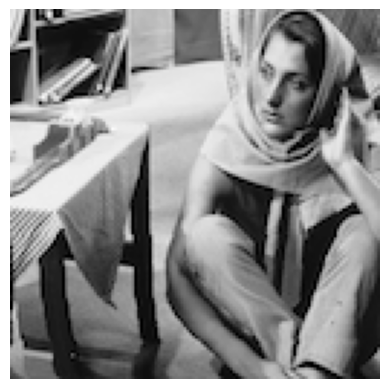

In [ ]:
image = Image.open("/content/gdrive/MyDrive/images-project-1/barbara.bmp")
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
def quantizer(image, levels):
    img = Image.open(image)
    step = 256 / levels
    quantized_values = [int(i * step + step / 2) for i in range(levels)]
    quantized_img = img.point(lambda p: quantized_values[int(p / step)])
    return quantized_img

levels = [8, 12, 16, 20]
for level in levels:
    quantized_img = quantizer("/content/gdrive/MyDrive/images-project-1/barbara.bmp", level)
    quantized_img.show()

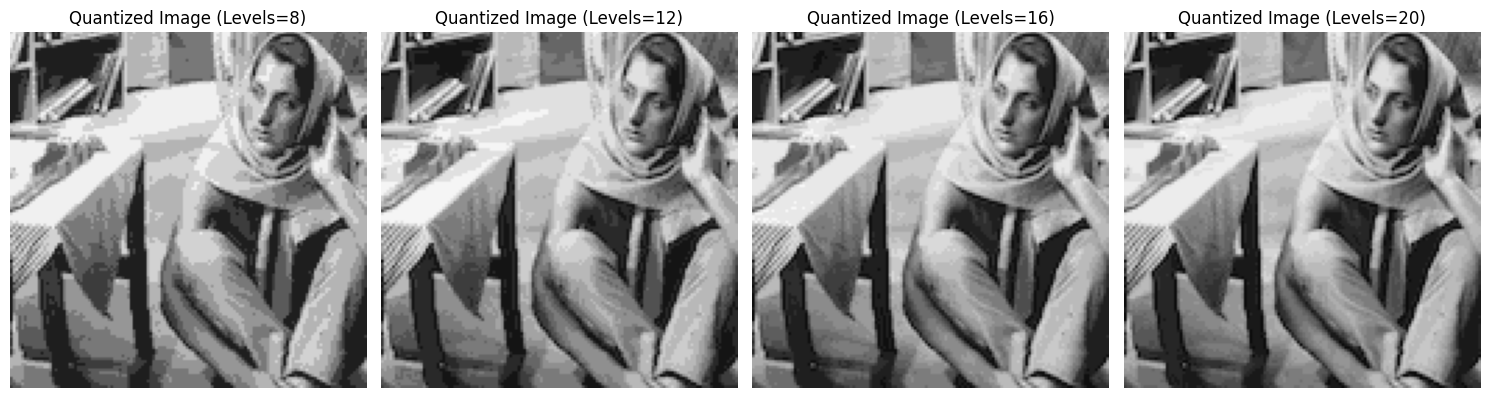

In [ ]:
def plot_images(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

levels = [8, 12, 16, 20]
images = []
titles = []
for level in levels:
    quantized_img = quantizer("/content/gdrive/MyDrive/images-project-1/barbara.bmp", level)
    images.append(quantized_img)
    titles.append(f'Quantized Image (Levels={level})')

plot_images(images, titles)

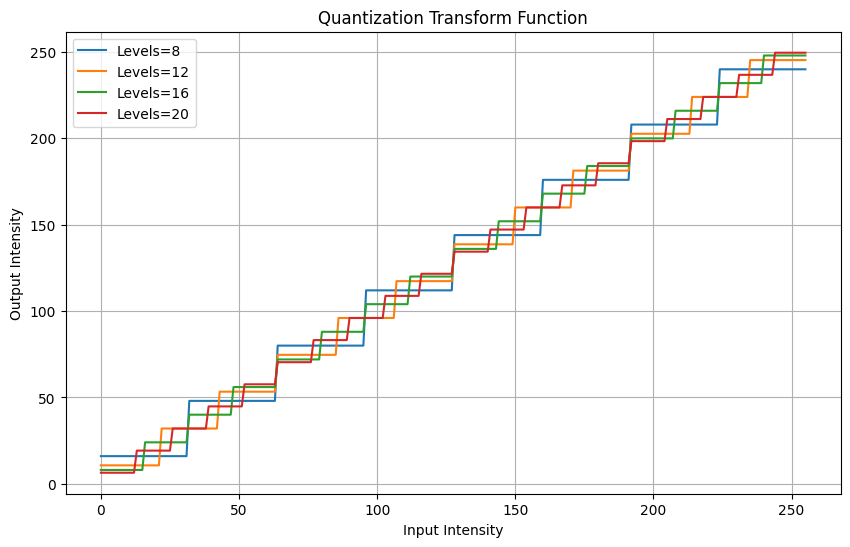

In [ ]:
def transform_function(levels):
    plt.figure(figsize=(10, 6))
    for level in levels:
        step = 256 / level
        x = np.arange(0, 256)
        y = np.floor(x / step) * step + step / 2
        plt.plot(x, y, label=f'Levels={level}')

    plt.title('Quantization Transform Function')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()

levels = [8, 12, 16, 20]
transform_function(levels)

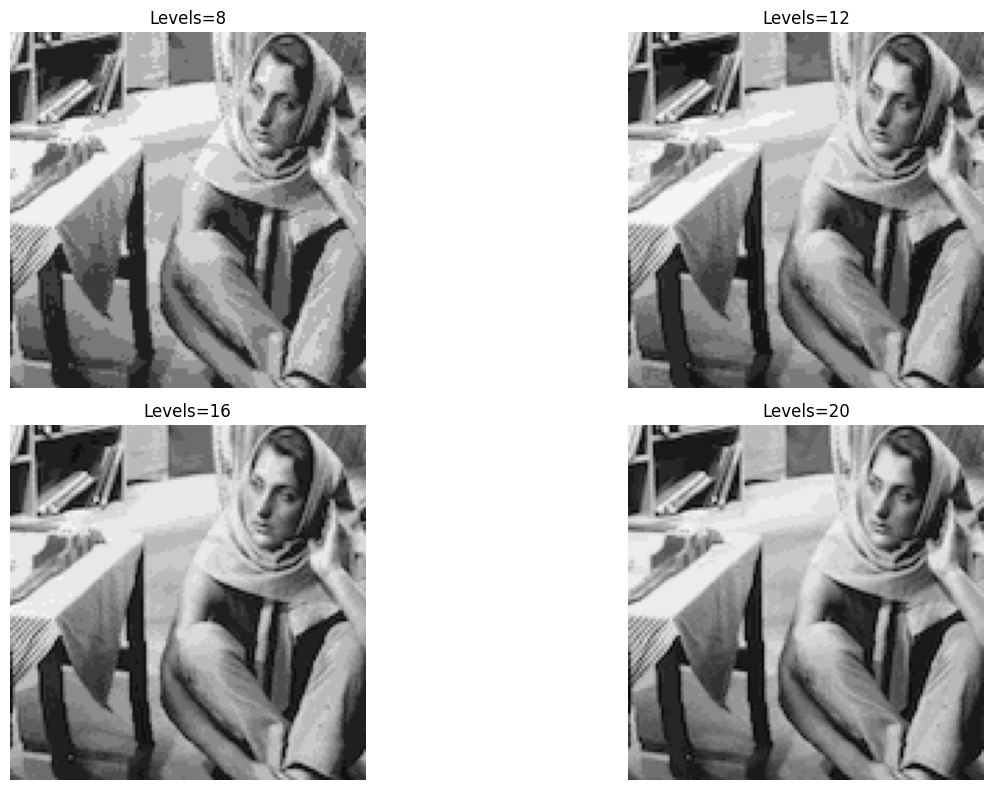

In [ ]:
#image="/content/gdrive/MyDrive/images-project-1/barbara.bmp"
def quantizers(image, levels):
    quantized_images = []
    for level in levels:
        quantized_img = quantizer("/content/gdrive/MyDrive/images-project-1/barbara.bmp", level)
        quantized_images.append(quantized_img)

    return quantized_images

def plot_quantized_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

levels = [8, 12, 16, 20]
quantized_images = quantizers("barbara.bmp", levels)
titles = [f'Levels={level}' for level in levels]
plot_quantized_images(quantized_images, titles)

In [ ]:
import numpy as np
from skimage.io import imread

def mean_squared_error(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return mse

original_image = load_image("/content/gdrive/MyDrive/images-project-1/barbara.bmp")

# Υπολογισμός του μέσου τετραγωνικού σφάλματος για κάθε περίπτωση
for i, level in enumerate(levels):
    quantized_image = quantized_images[i]
    mse = mean_squared_error(original_image, quantized_image)
    print(f"Μέσο τετραγωνικό σφάλμα για επίπεδα={level}: {mse}")

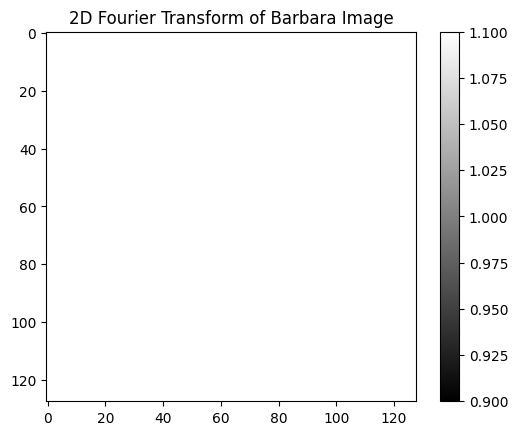

In [ ]:
image_path = "/content/gdrive/MyDrive/images-project-1/barbara.bmp"
image = Image.open(image_path)
image_array = np.array(image)

dft_image = np.fft.fft2(image_array)
plt.imshow(np.abs(dft_image), cmap='gray')
plt.title("2D Fourier Transform of Barbara Image")
plt.colorbar()
plt.show()

In [ ]:
magnitude_spectrum = np.abs(dft_image)
phase_spectrum = np.angle(dft_image)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.colorbar()
plt.show()

plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum")
plt.colorbar()
plt.show()

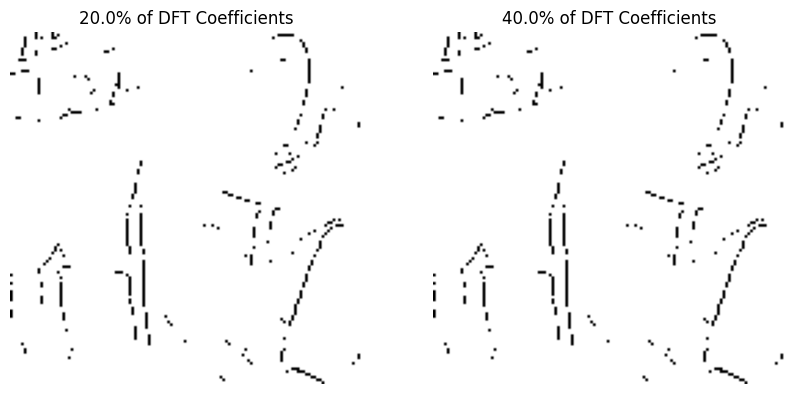

In [ ]:
dft_image = np.fft.fft2(image_array)
percentages = [0.2, 0.4]
num_coefficients = [int(p * np.prod(image_array.shape)) for p in percentages]

reconstructed_images = []
for num_coeffs in num_coefficients:
    dft_reconstructed = np.zeros_like(dft_image)
    dft_reconstructed[:num_coeffs, :num_coeffs] = dft_image[:num_coeffs, :num_coeffs]

    reconstructed_image = np.fft.ifft2(dft_reconstructed).real
    reconstructed_images.append(reconstructed_image)

plt.figure(figsize=(10, 5))
for i, reconstructed_image in enumerate(reconstructed_images):
    plt.subplot(1, len(reconstructed_images), i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"{percentages[i]*100}% of DFT Coefficients")
    plt.axis('off')
plt.show()

In [ ]:
mse_results = []

for reconstructed_image in reconstructed_images:
    mse = mean_squared_error(image_array, reconstructed_image)
    mse_results.append(mse)

for i, mse in enumerate(mse_results):
    print(f"Μέσο τετραγωνικό σφάλμα ανακατασκευής για το {percentages[i]*100}% των συντελεστών: {mse}")

Μέσο τετραγωνικό σφάλμα ανακατασκευής για το 20.0% των συντελεστών: 5.462255100723025e-29
Μέσο τετραγωνικό σφάλμα ανακατασκευής για το 40.0% των συντελεστών: 5.462255100723025e-29


In [ ]:
def dct2(image):
    N = len(image)
    dct_image = np.zeros_like(image, dtype=float)

    for u in range(N):
        sum_val = 0
        for x in range(N):
            cos_term = np.cos((2*x + 1) * u * np.pi / (2 * N))
            sum_val += image[x] * cos_term
        alpha = 1
        if u == 0:
            alpha = 1 / np.sqrt(2)
        dct_image[u] = alpha * sum_val / np.sqrt(N)

    return dct_image

def idct2(dct_image):
    N = len(dct_image)
    image = np.zeros_like(dct_image, dtype=float)

    for x in range(N):
        sum_val = 0
        for u in range(N):
            alpha = 1
            if u == 0:
                alpha = 1 / np.sqrt(2)
            cos_term = np.cos((2*x + 1) * u * np.pi / (2 * N))
            sum_val += alpha * dct_image[u] * cos_term
        image[x] = sum_val / np.sqrt(N)

    return image

dct_image = dct2(image_array)
reconstructed_image = idct2(dct_image)

image_path = "/content/gdrive/MyDrive/images-project-1/barbara.bmp"
barbara_image = np.array(Image.open(image_path).convert("L"))

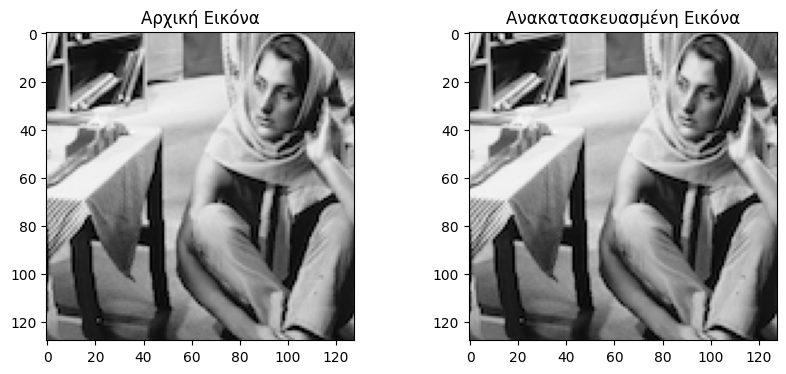

In [ ]:
image_path = "/content/gdrive/MyDrive/images-project-1/barbara.bmp"
barbara_image = np.array(Image.open(image_path).convert("L"))


dct_image = dct2(barbara_image.flatten())
reconstructed_image = idct2(dct_image)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(barbara_image, cmap='gray')
plt.title('Αρχική Εικόνα')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.reshape(barbara_image.shape), cmap='gray')
plt.title('Ανακατασκευασμένη Εικόνα')

plt.show()

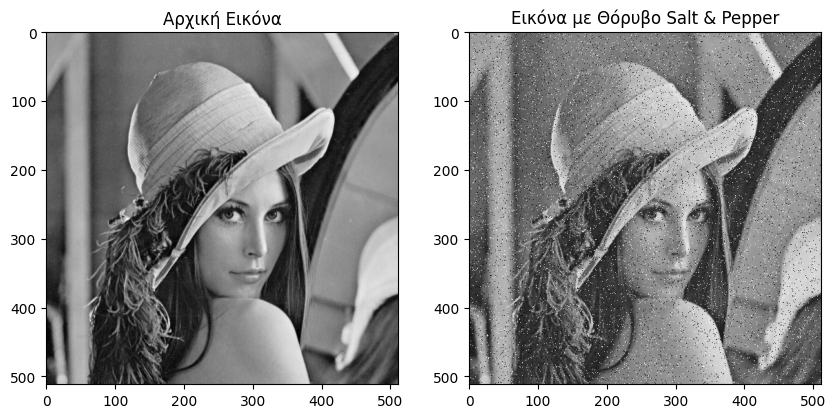

In [ ]:
image_path = "/content/gdrive/MyDrive/images-project-1/lenna.bmp"
lenna_image = imread(image_path, as_gray=True)


noisy_lenna = random_noise(lenna_image, mode='s&p', amount=0.05)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(lenna_image, cmap='gray')
plt.title('Αρχική Εικόνα')

plt.subplot(1, 2, 2)
plt.imshow(noisy_lenna, cmap='gray')
plt.title('Εικόνα με Θόρυβο Salt & Pepper')

plt.show()

In [ ]:
from skimage.filters import rank
from skimage.morphology import square

<ipython-input-73-181b050cecd3>:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_lenna_3x3 = rank.mean(noisy_lenna, square(3))
<ipython-input-73-181b050cecd3>:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_lenna_5x5 = rank.mean(noisy_lenna, square(5))
<ipython-input-73-181b050cecd3>:6: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered_lenna_7x7 = rank.mean(noisy_lenna, square(7))


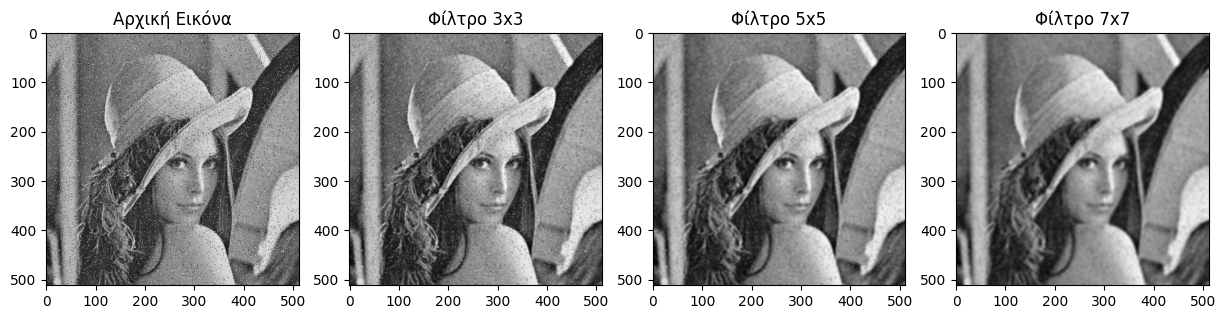

In [ ]:
noisy_lenna_path = "/content/gdrive/MyDrive/images-project-1/noisy_lenna.png"
#noisy_lenna = imread(noisy_lenna, as_gray=True)

filtered_lenna_3x3 = rank.mean(noisy_lenna, square(3))
filtered_lenna_5x5 = rank.mean(noisy_lenna, square(5))
filtered_lenna_7x7 = rank.mean(noisy_lenna, square(7))

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(noisy_lenna, cmap='gray')
plt.title('Αρχική Εικόνα')

plt.subplot(1, 4, 2)
plt.imshow(filtered_lenna_3x3, cmap='gray')
plt.title('Φίλτρο 3x3')

plt.subplot(1, 4, 3)
plt.imshow(filtered_lenna_5x5, cmap='gray')
plt.title('Φίλτρο 5x5')

plt.subplot(1, 4, 4)
plt.imshow(filtered_lenna_7x7, cmap='gray')
plt.title('Φίλτρο 7x7')

plt.show()

Μπορούμε να παρατηρήσουμε τη μείωση του θορύβου στις εικόνες μετά την εφαρμογή των φίλτρων μέσης τιμής με διαφορετικό μέγεθος πυρήνα. Η εικόνα με το φίλτρο 7x7 φαίνεται να έχει λιγότερο θόρυβο συγκριτικά με τις άλλες δύο.

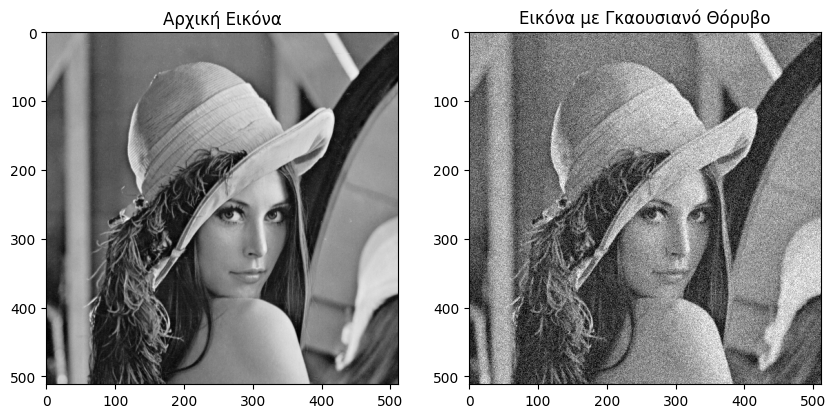

In [ ]:
lenna_path = "/content/gdrive/MyDrive/images-project-1/lenna.bmp"
lenna_image = imread(lenna_path, as_gray=True)


gaussian_noise_lenna = random_noise(lenna_image, mode='gaussian', mean=0, var=0.01)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(lenna_image, cmap='gray')
plt.title('Αρχική Εικόνα')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_noise_lenna, cmap='gray')
plt.title('Εικόνα με Γκαουσιανό Θόρυβο')

plt.show()

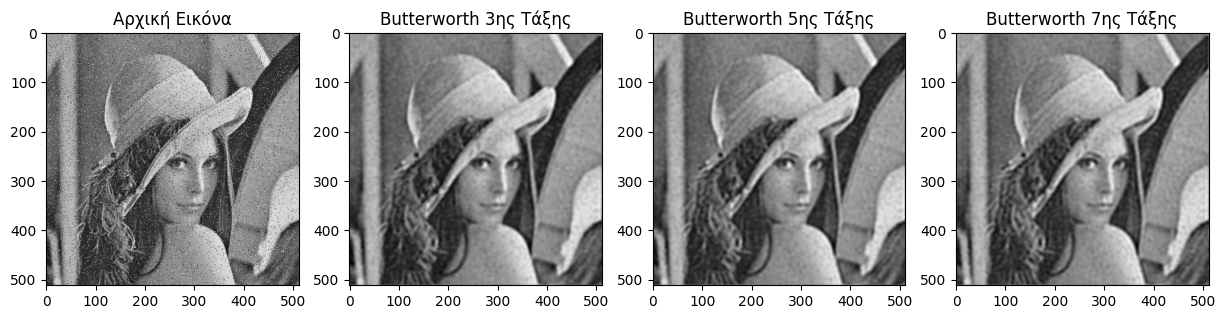

In [ ]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter

noisy_lenna_path = "/content/gdrive/MyDrive/images-project-1/noisy_lenna.png"
#noisy_lenna = plt.imread(noisy_lenna_path, cmap='gray')


frequencies = fftshift(fft2(noisy_lenna))

def butterworth_lp_filter(shape, cutoff, n):
    x = np.outer(np.linspace(-0.5, 0.5, shape[0]), np.ones(shape[1]))
    y = np.outer(np.ones(shape[0]), np.linspace(-0.5, 0.5, shape[1]))
    radius = np.sqrt(x**2 + y**2)
    return 1 / (1 + (radius / cutoff)**(2 * n))

filtered_images = []
for order in [3, 5, 7]:
    lp_filter = butterworth_lp_filter(noisy_lenna.shape, cutoff=0.1, n=order)
    filtered_frequencies = frequencies * lp_filter

    filtered_image = np.abs(ifft2(ifftshift(filtered_frequencies)))
    filtered_images.append(filtered_image)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(noisy_lenna, cmap='gray')
plt.title('Αρχική Εικόνα')

for i, order in enumerate([3, 5, 7]):
    plt.subplot(1, 4, i+2)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f'Butterworth {order}ης Τάξης')

plt.show()

 Μπορούμε να παρατηρήσουμε τη μείωση του θορύβου στις εικόνες μετά την εφαρμογή των φίλτρων Butterworth χαμηλής πέρασης. Με μεγαλύτερη τάξη του φίλτρου, η μείωση του θορύβου φαίνεται να είναι πιο αποτελεσματική.

In [ ]:
def k_means(image, K=8, max_iter=50):
    pixels = np.float32(image.reshape(-1, 3))
    centers = np.array(random.sample(list(pixels), K))

    for _ in range(max_iter):
        distances = np.linalg.norm(pixels[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centers = np.array([pixels[labels == k].mean(axis=0) for k in range(K)])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    segmented_image = centers[labels]
    segmented_image = np.uint8(segmented_image.reshape(image.shape))

    return segmented_image

image_path = "/content/gdrive/MyDrive/images-project-1/butterfly.jpg"
image = cv2.imread(image_path)

segmented_image = k_means(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')
plt.show()

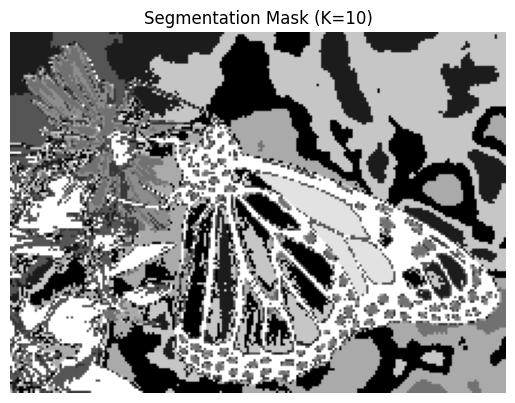

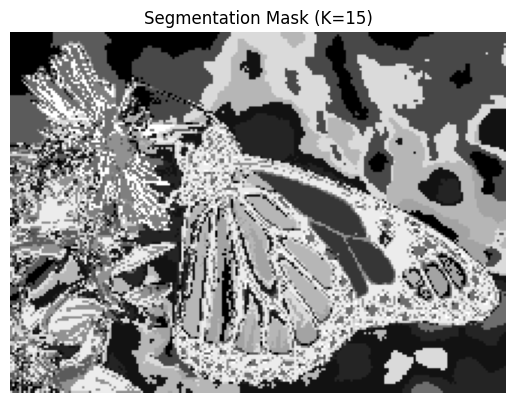

In [ ]:
def k_means_segmentation(image, K=5, max_iter=50):
    pixels = np.float32(image.reshape(-1, 3))
    centers = np.array(random.sample(list(pixels), K))

    for _ in range(max_iter):
        distances = np.linalg.norm(pixels[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centers = np.array([pixels[labels == k].mean(axis=0) for k in range(K)])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    segmented_image = centers[labels]
    segmented_image = np.uint8(segmented_image.reshape(image.shape))

    return segmented_image, labels

def visualize_segmentation(labels, K):
    mask = np.uint8(labels.reshape(image.shape[:2]) * (255 / (K - 1)))
    plt.imshow(mask, cmap='gray')
    plt.title(f'Segmentation Mask (K={K})')
    plt.axis('off')
    plt.show()

image_path = "/content/gdrive/MyDrive/images-project-1/butterfly.jpg"
image = cv2.imread(image_path)

for K in [5, 10, 15]:
    segmented_image, labels = k_means_segmentation(image, K)
    visualize_segmentation(labels, K)